# 04_hypothesis_analysis_and_insights.ipynb

**Project:** da-king-county-housing  
**Author:** Johannes Gooth  
**Date:** April 13, 2024

---

## 📘 Introduction

The dataset has been reviewed and confirmed to contain valid and plausible data. In this notebook, we will proceed to address the business case of our client, William Rodriguez, by conducting hypothesis testing, building on the insights gained from our previous Exploratory Data Analysis (EDA). The primary objective here is to validate or refute key hypotheses related to the King County housing market, directly answering critical business questions for our client and guiding strategic decision-making.

### Key Steps:
1. **Introducing our Client:**
Understanding the requirements of our client, we will tailor our hypotheses and analysis to meet his specific needs.

1. **Formulating Hypotheses:** Based on EDA findings, we will define clear, testable hypotheses that address the main business questions, such as factors influencing property prices and the impact of location on value.

2. **Selecting Appropriate Tests:** For each hypothesis, we will choose suitable statistical methods to rigorously evaluate the evidence.

3. **Conducting Hypothesis Tests:** We will perform the statistical tests, interpreting the results to determine whether each hypothesis is supported or refuted.

4. **Deriving Business Insights:** From the test outcomes, we will extract actionable insights to inform recommendations for real estate investment, pricing strategies, and market positioning.

### Expected Outcome:
A set of validated or refuted hypotheses, along with data-driven business insights, providing clear guidance for strategic decisions in the King County housing market.

---

## ⚙️ Setting-Up the Working Enviroment

In [76]:
import warnings
warnings.filterwarnings("ignore")

# Avoid restarting Kernel 
%load_ext autoreload
%autoreload 2

import sys
# setting path
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from src.basic_functions import *
from src.visualization_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

## 📥 Loading the Data

In [77]:
# Filepath of the CSV
file_path_csv = '../data/king_county_housing_data_cleaned_and_preprocessed.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(file_path_csv)

### Reapplying the Descriptive Label Order

In [78]:
# view_cat label
df = apply_category_order_from_json(df, 'view_cat', '../data/view_order.json')

# condition_cat label
df = apply_category_order_from_json(df, 'condition_cat', '../data/condition_order.json')

# grade_cat label
df = apply_category_order_from_json(df, 'grade_cat', '../data/grade_order.json')

# month_cat label
df = apply_category_order_from_json(df, 'month_cat', '../data/month_order.json')

# season_cat label
df = apply_category_order_from_json(df, 'season_cat', '../data/season_order.json')

---

## 🤝 Introducing Our Client

Our client, William Rodriguez, is a buyer with specific and distinct needs in the King County housing market. William is looking to purchase two properties: one in the countryside and one in the city. Each property serves a different purpose, and therefore, each comes with its own set of requirements.

- **Countryside House:**  
  William is looking for a non-renovated house in a rural area that offers the best timing for purchase. This likely indicates a focus on finding a property with potential for renovation and value appreciation. The countryside house will be home for two people, and William is interested in finding a property that aligns with a strategic purchase timeline.

- **City House:**  
  For the city property, William’s priorities are speed and a central location. He seeks a house that is centrally located within the city and can be acquired quickly, likely to ensure proximity to urban amenities and reduce commute times.

In this analysis, we will focus on addressing William's needs by analyzing the market to identify the best opportunities for purchasing both a countryside and a city house that align with his criteria. Through hypothesis testing and data-driven insights, we aim to provide William with recommendations that will help him make informed decisions in his property search.

---

## ❓ Research Questions and Hypothesis Generation
In this section of the notebook, we will systematically address the research questions posed by our client, William Rodriguez, by testing a series of hypotheses related to the King County housing market. These hypotheses are designed to answer key business questions, specifically tailored to help William make informed decisions about purchasing properties in both city and countryside locations. Below is an overview of the research questions and the corresponding hypotheses that we will test:

| # | Question | Hypothesis | Indicators |
|:-:|:-|:-|:-|
| 1 | How does the location (country vs. city) affect house prices and availability? | *"Location Impact Hypothesis"*: <br> City houses command higher prices than country houses due to increased demand for central locations, but the availability may be lower. | a) *Location (zipcode, lat, long)*: <br> Differentiate between country and city houses and evaluate central locations. Leverage zipcode, lat, and long to compare pricing, availability, and features of country vs. city houses (Comparative Location Analysis). For city houses, calculate distances from key city center landmarks (requiring additional data or assumptions based on lat and long - define city center and calculate the distance) to analyze price gradients and availability (Proximity Evaluation). |
| 2 | How does the size of a house (in terms of bedrooms and bathrooms) correlate with its suitability and value for a two-person household looking to purchase in both country and city locations? | *"Size Hypothesis"*: <br> For a two-person household, houses with fewer bedrooms (e.g., 1-2 bedrooms) and bathrooms are more cost-effective than larger properties. | a) *Number of Bedrooms (bedrooms)*: <br> To analyze the correlation between the house size suitable for two people and its market value. <br> b) *Number of Bathrooms (bathrooms)*: <br> To further refine the suitability analysis based on common needs for a two-person household. <br> c) *Square Footage of the Home (sqft_living)*: <br> To consider the overall living space, which is particularly relevant for understanding comfort and suitability for the household size. |
| 3 | Does the age and the condition of a house affect the price? | *"Condition Hypothesis"*: <br> Newer and better-maintained houses command higher prices than older and less well-maintained ones. | a) *Age of the House (yr_built)*: <br> This can be directly used to assess the age of the house. Consider calculating the "actual age" of the house at the time it was sold, which could involve subtracting 'yr_built' from the year in the date column. <br> b) *Condition of the House (condition)*: <br> This column rates the overall condition of the house and can be used to evaluate how well-maintained the house is. <br> c) *Year Renovated (yr_renovated)*: <br> This can provide additional insights into the condition and up-to-dateness of the house. A recent renovation could significantly impact the house's perceived value, even if the house itself is older. Consider creating a binary indicator for whether the house has been renovated at all, or calculate how recently the renovation occurred (e.g., years since the last renovation). <br> d) *Grade (grade)*: Although not directly mentioned in the hypothesis, the overall grade given to the housing unit could serve as a proxy for its quality, including factors related to its construction, design, and functionality, which are likely correlated with both age and condition. <br> d) *Price (price)*: <br> As the outcome variable, the price at which the house was sold will be the primary indicator of market value you’re trying to explain or predict. |
| 4 | What is the optimal timing to buy a house in the country to get the best deal? | *"Optimal Timing Hypothesis"*: <br> There are seasonal trends in house pricing and availability, with certain times of the year offering better deals, especially for country houses. | a) *Date of Sale (date)*: <br> Analyze seasonal trends and optimal buying times. (seasonal analysis). Use the 'date' column to identify patterns or trends in pricing and availability over different months or seasons. |

In the following sections, we will systematically address each hypothesis, using the data to evaluate and answer them step by step.

---

## 💡 Location Impact Hypothesis

### Mapping All Datapoints on the Map of Seattle
To visually analyze the impact of location on house prices and availability, we will start by mapping all the data points representing properties in the King County housing dataset onto a map of Seattle, including a marker for the city center. This visual representation will allow us to distinguish between city and countryside properties and observe patterns in their geographical distribution, which is crucial for understanding how location affects property values. By plotting the properties' locations, we can also begin to explore the proximity of city houses to central landmarks and how this proximity might influence their pricing.

In [79]:
df.describe


<bound method NDFrame.describe of                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3      1.000         1180      5650   1.000   
1      6414100192         3      2.250         2570      7242   2.000   
2      5631500400         2      1.000          770     10000   1.000   
3      2487200875         4      3.000         1960      5000   1.000   
4      1954400510         3      2.000         1680      8080   1.000   
...           ...       ...        ...          ...       ...     ...   
21415   263000018         3      2.500         1530      1131   3.000   
21416  6600060120         4      2.500         2310      5813   2.000   
21417  1523300141         2      0.750         1020      1350   2.000   
21418   291310100         3      2.500         1600      2388   2.000   
21419  1523300157         2      0.750         1020      1076   2.000   

      waterfront  view  condition  grade  ...  renovation_status  \
0            NaN 0.00

In [80]:
plot_map(df)

### Visualizing City and Countryside Houses Alongside Seattle's Center on a Unified Map Based on Our Analysis
In this section, we will visualize both city and countryside houses on a single map, including a marker for Seattle's city center. This unified map will help us compare the geographical distribution of properties and how their proximity to the city center might impact pricing and availability. By overlaying these data points, we aim to gain a clearer understanding of the location dynamics that are central to our analysis of the King County housing market.

In [81]:
plot_map(
    df,
    location_type_col='location_type',
    custom_legend_names={'city': 'City Houses', 'countryside': 'Counryside Houses'},
    color_map={'city': '#84a8cb', 'countryside': '#bd8585'}
)

### Comparative Location Analysis

In this section, we will compare basic metrics between city and countryside houses to assess the impact of location on property characteristics. Specifically, we will examine:

- **Price:** The average price of houses in the city versus the countryside.
- **Square Footage (sqft_living):** The average living space of homes, measured in square feet, across both locations.
- **Location Type (location_type):** A categorical variable indicating whether a property is located in the 'city' or the 'countryside'.

By analyzing these metrics, we aim to identify any significant differences between city and countryside properties, providing insights into how location influences both pricing and the size of homes. This comparative analysis will help us test the "Location Impact Hypothesis" and understand the distinct characteristics of urban and rural housing markets in King County.

**Price and Square Footage of Living Space**

These metrics provide insights into the typical property size and value in different locations.

The results are visualized in a bar chart with error bars, which represent the variability (standard deviation) in price and square footage within each location type. This visualization helps to compare:

- *Average Price:* How the average property price differs between city and countryside locations.
- *Average Square Footage:* How the average size of homes compares between these two settings.

The use of error bars provides additional context by showing the range of variability around the mean values, indicating how much prices and sizes vary within each group. This is particularly important for understanding the consistency of the data within each location type.

Visualization Details:

1. *Average Price ($):*  
   The first subplot shows the average price for city versus countryside houses, with standard deviation error bars to indicate the variation in prices.

2. *Average Living Space (square feet):*  
   The second subplot illustrates the average living space for city versus countryside houses, again with error bars to highlight variability.

In [82]:
plot_bar_plots_with_categories(
    df, 
    category_col='location_type', 
    price_col='price', 
    sqft_col='sqft_living',
    x_labels=['City Houses', 'Countryside Houses'],
    y_label1="Average Price ($)",
    y_label2="Average Living Area (sqft)",
    y_tick_spacing1=250000, y_tick_spacing2=1000,
    bar_colors=['#84a8cb', '#bd8585'],
    grid_color='lightgrey'  # Ticks will be the same color as grid lines
)

The initial analysis suggests that the hypothesis—that city houses command significantly higher prices than countryside houses—is not strongly supported. Within one standard deviation, the prices between city and countryside properties are comparable, and the living spaces are also similar. This indicates that larger houses in the countryside do not necessarily compensate for the price difference between city and countryside properties.

**Examine Price per Square Foot**

To further explore the potential differences in value between city and countryside houses, we will now examine the average price per square foot. This metric allows us to assess whether city properties, despite their similar overall prices and living spaces, are valued more highly on a per-unit basis compared to countryside properties. Analyzing price per square foot will provide deeper insights into how location impacts property value and whether city homes indeed command a premium when considering the efficiency of space utilization.

The box plot and the violin plot below provide a visual representation of the distribution of price per square foot in both settings, allowing us to assess whether city properties are valued more highly on a per-unit basis compared to countryside properties

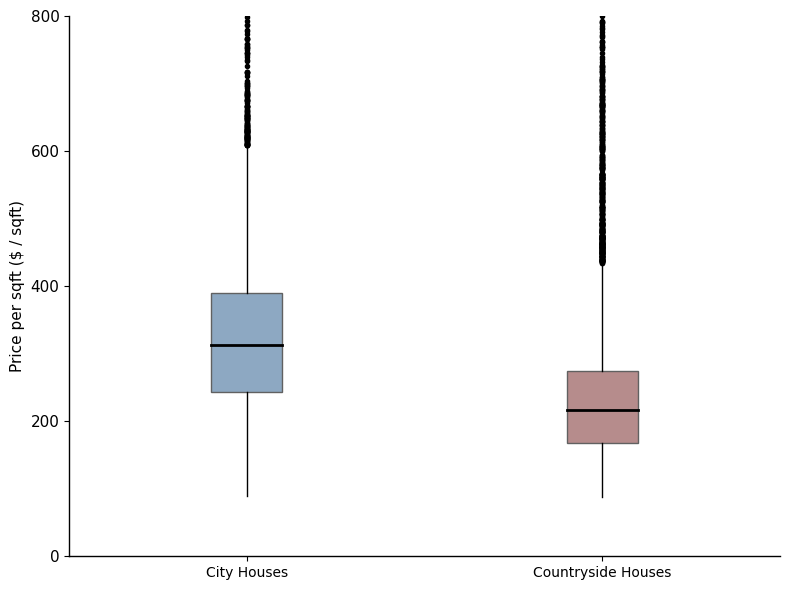

In [83]:
plot_box_plot(
    df=df, 
    value_col='price_per_sqft', 
    category_col='location_type', 
    custom_legend_names={'city': 'City Houses', 'countryside': 'Countryside Houses'},
    color_map={'city': '#84a8cb', 'countryside': '#bd8585'}, 
    y_tick_intervals=(0, 800, 200),
    y_label='Price per sqft ($ / sqft)'
)

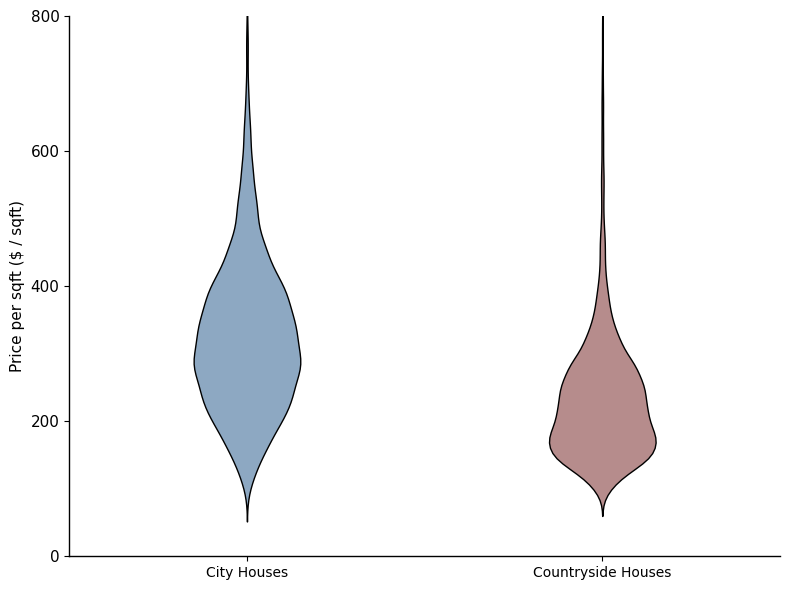

In [84]:
plot_violin_plot(
    df=df, 
    value_col='price_per_sqft', 
    category_col='location_type', 
    custom_legend_names={'city': 'City Houses', 'countryside': 'Countryside Houses'},
    color_map={'city': '#84a8cb', 'countryside': '#bd8585'}, 
    y_tick_intervals=(0, 800, 200),
    y_label='Price per sqft ($ / sqft)'
)

While the average price per square foot in the countryside is lower, the substantial standard deviation indicates that prices between city and countryside homes can be relatively comparable. To gain further insights, we will now take a look from another angle and analyze how proximity to key city center landmarks impacts property prices in the city.

**Proximity Evaluation for City Houses**

In this section, we will focus on city properties and evaluate how their price gradients change relative to their distance from central landmarks. This analysis will help us understand whether closer proximity to the city center and key amenities significantly increases property values. By examining the relationship between distance and price, we aim to determine if a price premium exists for homes located nearer to the city center, which could be a critical factor for urban buyers prioritizing location.

By categorizing distances into bins and calculating the average price for each bin, we can observe the price gradient as homes get closer or further from the city center.

In [85]:
# Example usage for price:
bins = np.linspace(0, 20, 21)  # Creating 20 bins for the range 0-20 miles
plot_bins(df, 'price', 'Average Price ($)', bins, y_tick_dist=500000)

The proximity evaluation reveals an interesting trend: there is a middle range where countryside house prices significantly exceed those in the city. This anomaly could be attributed to desirable suburbs located near the city center, where the appeal of more spacious properties might drive up prices. However, it's also possible that the presence of larger lots in these suburban areas is influencing this trend.

To explore this further, we will revisit the average price per square foot. By focusing on the price per square foot, we can better understand whether these higher prices in the countryside are due to genuinely more valuable properties or simply a result of larger lot sizes inflating overall prices. This analysis will help us determine if the price premium in these middle-range areas is justified on a per-square-foot basis, offering deeper insights into the factors driving property values in these desirable suburban locations.

In [86]:
# Example usage for price per sqft:
plot_bins(df, 'price_per_sqft', 'Average Price per Sqft ($)', bins, y_tick_dist=200)

Within the 0-3 mile range in the city, prices are indeed slightly higher than those located 8 or more miles from the city center. Interestingly, there's an intermediate range where properties combine the appeal of countryside living with proximity to the city center, resulting in the highest house prices. Therefore it seems more advantageous for our client to buy his city house within 0-3 miles from the center and his country house more than 8 miles away fromthe center.

Let's create a Plotly scatter mapbox plot that includes only houses that are either city houses within 3 miles of the center or countryside houses that are more than 8 miles away from the center:

In [87]:
# Create filter to include city houses within 3 miles and countryside houses beyond 8 miles
df_filtered = df[
    ((df['location_type'] == 'city') & (df['mile_dist_center'] < 3)) |
    ((df['location_type'] == 'countryside') & (df['mile_dist_center'] > 8))
]

# Exclude houses between 3 and 8 miles
df_filtered = df_filtered[~((df['mile_dist_center'] > 3) & (df['mile_dist_center'] < 8))]

In [88]:
plot_map(
    df_filtered,
    location_type_col='location_type',
    custom_legend_names={'city': 'City Houses', 'countryside': 'Counryside Houses'},
    color_map={'city': '#84a8cb', 'countryside': '#bd8585'}
)

### Conclusion
Regarding the validity of our hypothesis, it appears to be context-dependent. Considering our client's preference for a home close to the city, a countryside property located 8 miles or more from the city center might actually be more appealing to him. In this scenario, the hypothesis holds true for his specific needs and preferences.

---

## 💡 Size Hypothesis

To analyze the "Size Hypothesis" which suggests that houses with fewer bedrooms (1-2) and bathrooms are more cost-effective for a two-person household, and to understand the impact of these factors along with square footage on the market value, we can create plots for each indicator. These will include:

- Number of Bedrooms vs. Price: To observe how the market value correlates with the number of bedrooms, suitable for a two-person household.

- Number of Bathrooms vs. Price: To refine the analysis based on the number of bathrooms, addressing common needs for a two-person household.

- Living Space of the Home vs. Price: To assess the impact of living space on the market value of a home.

- Lot Size vs. Price: To assess the impact of lot size to market value of a home.

For this analysis, we'll use Plotly for visualization to create scatter plots, which are suitable for observing correlations and trends.

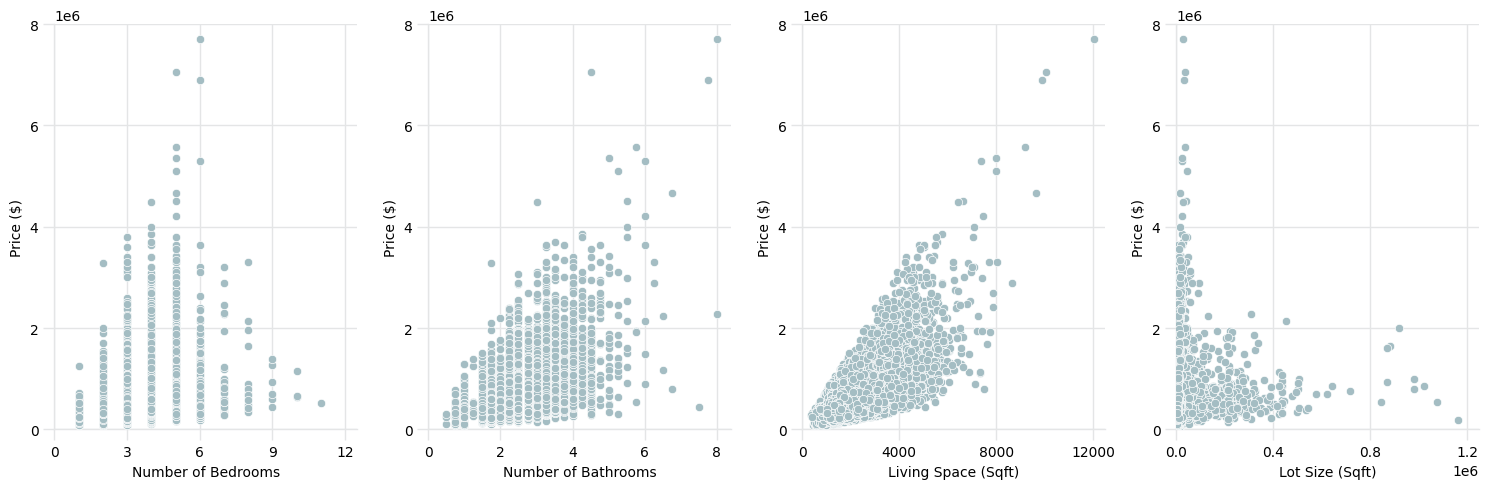

In [89]:
plot_scatter_plot(df, figsize=(15, 5))

To enhance the clarity of our analysis, especially since the values on x-axis in the two upper panels is discrete, we've supplemented the scatter plots with additional bar plots. These bar plots will provide a more straightforward visualization of how the number of bedrooms and bathrooms correlate with the market value, making it easier to interpret trends and patterns in these discrete variables. This dual approach ensures a more comprehensive understanding of the "Size Hypothesis" and its implications for our client's decision-making process.

In [90]:
# Prepare the data
avg_price_per_bedroom = df.groupby('bedrooms')['price'].mean().reset_index()
avg_price_per_bathroom = df.groupby('bathrooms')['price'].mean().reset_index()

avg_price_data_bedroom = avg_price_per_bedroom.rename(columns={'bedrooms': 'x', 'price': 'y'})
avg_price_data_bathroom = avg_price_per_bathroom.rename(columns={'bathrooms': 'x', 'price': 'y'})

# Plot the data
plot_bar_plot(
    avg_price_data_bedroom, 
    avg_price_data_bathroom,
    x_label1="Number of Bedrooms", 
    y_label1="Average Price ($)", 
    x_label2="Number of Bathrooms", 
    y_label2="Average Price ($)", 
    x_tick_spacing1=1, 
    y_tick_spacing1=400000, 
    x_range1=[0, 11.6], 
    y_range1=[0, 1240000],
    x_tick_spacing2=1, 
    y_tick_spacing2=1500000, 
    x_range2=[0, 8.3], 
    y_range2=[0, 7750000]
)

### Conclusion

- **Average Price vs. Number of Bedrooms:**  
  This bar plot visualizes the average price for homes with varying numbers of bedrooms, providing insights into cost-effectiveness trends for smaller homes, particularly those with 1-2 bedrooms, which are ideal for a two-person household. This analysis helps to affirm the "Size Hypothesis," suggesting that homes with fewer bedrooms may offer better value for smaller households.

- **Average Price vs. Number of Bathrooms:**  
  Similarly, this plot examines the average price across homes with different numbers of bathrooms, further refining our analysis of suitability for two-person households. By comparing market values in relation to the number of bathrooms, we can better understand the cost implications of this key factor, supporting the "Size Hypothesis" for properties with 1-2 bathrooms, which align with the needs of smaller households.

This method of analysis provides a direct comparison of market values based on the number of bedrooms and bathrooms, reinforcing the "Size Hypothesis" and emphasizing the cost-effectiveness of properties that are well-suited for a two-person household.

---

## 💡 Condition Hypothesis


To analyze the "Condition Hypothesis," which suggests that newer and better-maintained houses command higher prices than older and less well-maintained ones, we can follow a structured approach that examines key indicators. Below is a detailed analysis and visualization strategy using Python and Plotly:

### Age of the House vs. Price
This analysis looks at the relationship between the age of the house at the time of sale and its market value. We calculate the average price for houses based on their age and visualize this relationship to see if younger houses tend to command higher prices.

In [91]:
# Prepare the data
avg_price_by_age = df.groupby('age_at_sale')['price'].mean().reset_index()
avg_price_by_age_sorted = avg_price_by_age.sort_values(by='age_at_sale')

avg_price_data1 = avg_price_by_age_sorted.rename(columns={'age_at_sale': 'x', 'price': 'y'})

# Plot the data
plot_bar_plot(
    avg_price_data1, 
    x_label1="Age at Sale (yrs)", 
    y_label1="Average Price ($)", 
    x_tick_spacing1=20, 
    y_tick_spacing1=200000, 
    x_range1=[0, 117], 
    y_range1=[0, 820000]
)

### Condition of the House vs. Price
This part of the analysis evaluates how the condition of the house affects its price. Therefore, the average price is calculated for each condition category.

In [92]:
# Prepare the data
avg_price_by_condition_label = df.groupby('condition_cat')['price'].mean().reset_index()
avg_price_data = avg_price_by_condition_label.rename(columns={'condition_cat': 'x', 'price': 'y'})

# Plot the data
plot_bar_plot(
    avg_price_data1=avg_price_data, 
    x_label1="Condition of the House",  # X-axis label matching the original plot
    y_label1="Average Price ($)",  # Y-axis label matching the original plot
    x_tick_spacing1=1, 
    y_tick_spacing1=200000,  # Adjust y-axis tick spacing for better readability
    x_range1=[-0.5, len(avg_price_data) - 0.5],  # Set x-axis range to match the number of categories
    y_range1=[0, avg_price_data['y'].max() * 1.01]  # Set y-axis range with a bit of margin
)

### Impact of Renovation
This analysis compares the prices of renovated versus non-renovated houses to see how renovations affect market value. A box plot and a violin plot are used to visualize the price distribution for both groups.

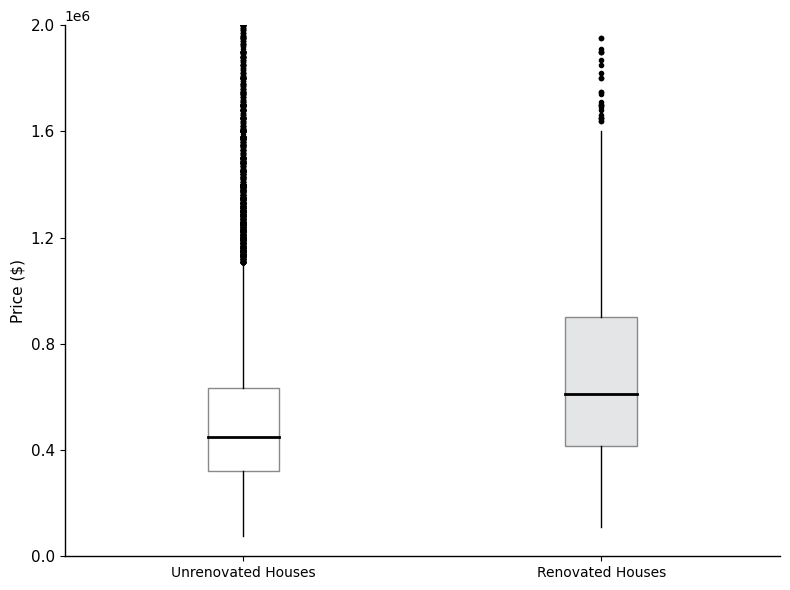

In [93]:
plot_box_plot(
    df=df, 
    value_col='price', 
    category_col='renovation_status',  
    custom_legend_names={'renovated': 'Renovated Houses', 'unrenovated': 'Unrenovated Houses'},
    color_map={'renovated': '#e4e5e6', 'unrenovated': 'white'},
    y_tick_intervals=(0, 2000000, 400000),
    y_label='Price ($)'
)

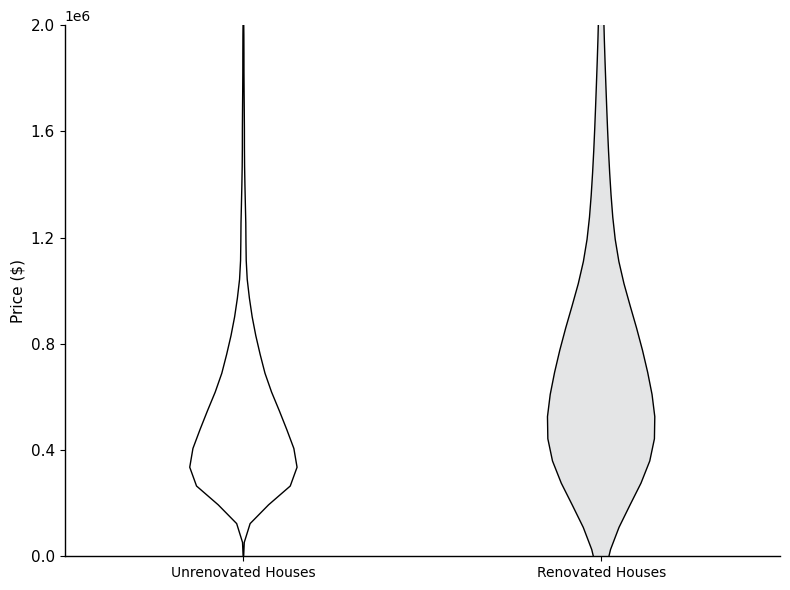

In [94]:
plot_violin_plot(
    df=df, 
    value_col='price', 
    category_col='renovation_status',  
    custom_legend_names={'renovated': 'Renovated Houses', 'unrenovated': 'Unrenovated Houses'},
    color_map={'renovated': '#e4e5e6', 'unrenovated': 'white'},
    y_tick_intervals=(0, 2000000, 400000),
    y_label='Price ($)'
)

### Grade of the House vs. Price
The final analysis assesses how the grade of the house, which serves as a proxy for quality, correlates with its price. Therefore, the average price for each grade category is visualized.

In [95]:
# Preparing the data
avg_price_by_grade_cat = df.groupby('grade_cat')['price'].mean().reset_index()
avg_price_data_grade = avg_price_by_grade_cat.rename(columns={'grade_cat': 'x', 'price': 'y'})

# Plot the data using the custom plot_bar_plot function
plot_bar_plot(
    avg_price_data1=avg_price_data_grade, 
    x_label1="Grade Category",  # X-axis label
    y_label1="Average Price ($)",  # Y-axis label
    x_tick_spacing1=1,  # X-axis tick spacing
    y_tick_spacing1=1000000,  # Y-axis tick spacing
    x_range1=[-0.5, len(avg_price_data_grade) - 0.5],  # Adjust x-axis range dynamically
    y_range1=[0, avg_price_data_grade['y'].max() * 1.11]  # Adjust y-axis range with a bit of margin
)

### Conclusion

- **Age at Sale:** Younger houses show no trend towards higher prices. Therefore, the actual impact needs to be viewed in conjunction with condition and renovations.
- **Condition and Grade:** Higher condition ratings and grades correlate with higher prices. These factors can serve as quality indicators.
- **Renovation's Impact:** The data shows that renovated houses tend to have higher prices, particularly if the renovation is recent. This underscores the hypothesis that well-maintained or updated homes command higher prices.

This structured approach provides a comprehensive analysis of the factors influencing house prices, supporting the "Condition Hypothesis." By examining age, condition, renovation status, and grade, we gain a deeper understanding of how these elements contribute to the market value of homes in King County.

---

## 💡 Optimal Timig Hypothesis

To analyze the "Optimal Timing Hypothesis" and explore seasonal trends in house pricing and availability, we will identify patterns across different months or seasons.

### Calculating Average Prices by Month

In [96]:
# Prepare the data
avg_price_per_month = df.groupby('month_cat')['price'].mean().reset_index() 
avg_price_per_month_data = avg_price_per_month.rename(columns={'month_cat': 'x', 'price': 'y'})

# Plot the data
plot_bar_plot(
    avg_price_per_month_data, 
    x_label1="Month", 
    y_label1="Average Price ($)", 
    x_tick_spacing1=1, 
    y_tick_spacing1=200000, 
    x_range1=[-0.5, 11.5], 
    y_range1=[0, 620000]
)

### Calculating Average Prices by Season

In [97]:
# Prepare the data
avg_price_per_season = df.groupby('season_cat')['price'].mean().reset_index() 
avg_price_per_season_data = avg_price_per_season.rename(columns={'season_cat': 'x', 'price': 'y'})

# Plot the data
plot_bar_plot(
    avg_price_per_season_data, 
    x_label1="Season", 
    y_label1="Average Price ($)", 
    x_tick_spacing1=1, 
    y_tick_spacing1=200000, 
    x_range1=[-0.5, 3.5], 
    y_range1=[0, 620000]
)

### Conclusion

- **Seasonal Trends:**
A trend is already evident from the seasonal analysis: purchasing during the winter appears to be optimal. This could be due to lower demand in colder months, leading to more competitive pricing for buyers.

This analysis provides valuable insights into the optimal timing for purchasing a house in the King County housing market. By identifying periods where prices are generally lower, such as in the winter months, our client can make more informed decisions about when to enter the market, potentially securing better deals. This aligns with the "Optimal Timing Hypothesis" and reinforces the importance of timing in real estate transactions.

---

## 📄 Closing
In this notebook, we thoroughly analyzed several key hypotheses related to the King County housing market to provide actionable insights for our client. Through detailed analysis and visualization, we examined how location, size, condition, and timing influence property prices.

- **Location Impact Hypothesis:** We found that properties closer to the city center generally command higher prices, especially within a 3-mile radius. However, certain desirable suburban areas located 8 miles or more from the city center also exhibit higher prices, likely due to their unique blend of countryside appeal and proximity to urban amenities.
  
- **Size Hypothesis:** Our analysis confirmed that smaller homes with 1-2 bedrooms and bathrooms are more cost-effective, particularly for a two-person household. This supports the hypothesis that size significantly impacts market value, with smaller homes offering better value for households with fewer occupants.

- **Condition Hypothesis:** The data showed that newer, well-maintained, and recently renovated houses indeed command higher prices. Condition and grade emerged as strong indicators of quality, directly influencing market value.

- **Optimal Timing Hypothesis:** Seasonal trends suggest that purchasing during the winter months could offer the best deals, as prices tend to be lower during this period due to reduced demand.

In the next notebook, **05_Final_Recommendations_and_Strategy.ipynb**, we will build on these insights to formulate tailored recommendations for our client. This final phase will involve synthesizing all the analyses and findings into strategic advice, ensuring that every recommendation aligns with our client’s specific goals and preferences. We will also conduct any additional necessary validations to strengthen the foundation of our advice, guiding our client toward making informed, strategic real estate investments in the King County housing market.